In this assignment, I will use data from a random sample of loans obtained from a peer-to-peer 
lending platform with the goal to predict who will default at its loan using features provided in the 
data.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
train = pd.read_csv("trainData.csv")
test = pd.read_csv("testData.csv")

We are going to be doing our data exploration on the training dataset. It is good practice to separate training set and test set so as to prevent data leakage.

### Data Exploration

As we explore the dataset, we might notice some interesting insights. We might also a need for necessary data cleaning techniques.

In [3]:
train.shape

(226067, 33)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211456 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226067 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225887 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226062 non-null  float64
 13  mths_since_las

We can see that our datasets has gotvariables with different data types. And there is a presence of null values in other columns.

In [5]:
train.describe()

,id,member_id,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,0.0,0.0,226067.000000,226067.000000,226067.000000,2.260670e+05,225887.000000,226062.000000,226062.000000,110227.000000,...,226067.000000,2.260670e+05,226067.000000,226067.000000,226067.000000,226051.000000,226062.000000,2.189600e+05,2.189600e+05,2.189600e+05
mean,NaN,NaN,15057.970978,13.090849,446.346484,7.820852e+04,18.803682,0.308331,0.579098,34.459543,...,2382.535509,1.445165e+00,138.644682,23.055114,3364.763642,0.017903,0.004145,2.625639e+02,1.426342e+05,3.459316e+04
std,NaN,NaN,9177.346912,4.826360,266.990994,8.235856e+04,14.094897,0.863639,0.886968,21.913699,...,2656.971144,1.117527e+01,740.937429,129.217751,5973.518321,0.151474,0.069219,1.963429e+04,1.614333e+05,3.516215e+04
min,NaN,NaN,500.000000,5.310000,16.310000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.100000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,8000.000000,9.490000,252.930000,4.606050e+04,11.880000,0.000000,0.000000,16.000000,...,693.145000,0.000000e+00,0.000000,0.000000,309.210000,0.000000,0.000000,0.000000e+00,2.917875e+04,1.470000e+04
50%,NaN,NaN,12975.000000,12.620000,378.200000,6.500000e+04,17.840000,0.000000,0.000000,31.000000,...,1480.160000,0.000000e+00,0.000000,0.000000,587.920000,0.000000,0.000000,0.000000e+00,7.963850e+04,2.540000e+04
75%,NaN,NaN,20000.000000,15.990000,594.005000,9.400000e+04,24.500000,0.000000,1.000000,50.000000,...,3049.280000,0.000000e+00,0.000000,0.000000,3524.320000,0.000000,0.000000,0.000000e+00,2.135938e+05,4.320000e+04
max,NaN,NaN,40000.000000,30.990000,1714.540000,9.300000e+06,999.000000,30.000000,16.000000,161.000000,...,28192.500000,7.681700e+02,34740.400000,5192.990000,41253.540000,8.000000,5.000000,9.152545e+06,9.971659e+06,1.875800e+06


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,226067.0,15057.970978,9177.346912,5.000000e+02,8000.000,12975.00,20000.00000,4.000000e+04
int_rate,226067.0,13.090849,4.826360,5.310000e+00,9.490,12.62,15.99000,3.099000e+01
installment,226067.0,446.346484,266.990994,1.631000e+01,252.930,378.20,594.00500,1.714540e+03
annual_inc,226067.0,78208.519911,82358.564421,0.000000e+00,46060.500,65000.00,94000.00000,9.300000e+06
dti,225887.0,18.803682,14.094897,0.000000e+00,11.880,17.84,24.50000,9.990000e+02
delinq_2yrs,226062.0,0.308331,0.863639,0.000000e+00,0.000,0.00,0.00000,3.000000e+01
inq_last_6mths,226062.0,0.579098,0.886968,0.000000e+00,0.000,0.00,1.00000,1.600000e+01
mths_since_last_delinq,110227.0,34.459543,21.913699,0.000000e+00,16.000,31.00,50.00000,1.610000e+02


The code chunk above gives us a summary of numerical columns, and their measures of central tendency. We can clearly see that the column 'id' and 'member_id' contain no values as they have probably been anonymised. We will not be needing thse columns for our analysis and thus we will be dropping them form both our training and test datasets.

In [7]:
# Remove unnecessary columns (ID-related columns)
train = train.iloc[:, 2:] 
test = test.iloc[:, 2:]

We are then going to be doing different distribution to numerical features and to categorical features. As we have seen that our dataset contains both numerical and categorical variables.

Since our interest is mainly to predict who will default and not, we will reate a new variable from trainData called “y” which takes the value = 1 if the column “loan status”
has the value “Charged Off” and 0 otherwise. And continue with our exploratory analysis.
We have set the type for column 'y' as object for the sake of Exploratory Analysis. We will convert it to an integer when we perfom our modelling

In [8]:
# Create target variable 'y'
train['y'] = (train['loan_status'] == 'Charged Off').astype(int)
train.drop('loan_status', axis=1, inplace=True)
test['y'] = (test['loan_status'] == 'Charged Off').astype(int)
test.drop('loan_status', axis=1, inplace=True)

In [9]:
# Explore data
categorical_features = train.select_dtypes(include=[object])
numerical_features = train.select_dtypes(include=[float, int])

In [10]:
print("No of Numerical features =",len(numerical_features))
print("No of Categorical features =",len(categorical_features))

No of Numerical features = 226067
No of Categorical features = 226067


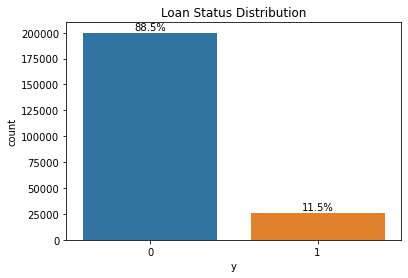

<Figure size 432x288 with 0 Axes>

In [11]:
ax = sns.countplot(data = train, x = 'y')
total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Loan Status Distribution')
plt.show()
plt.savefig('loan_status_distribution.png')

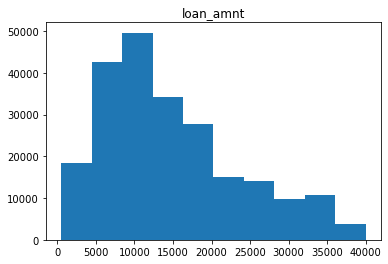

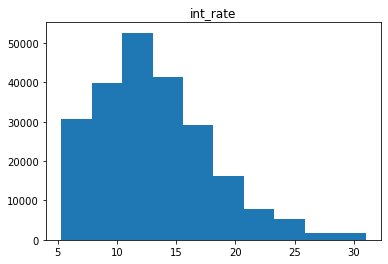

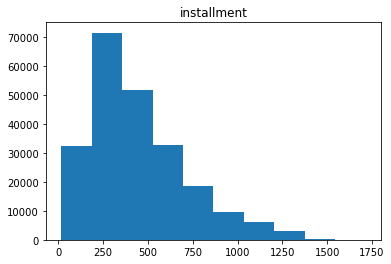

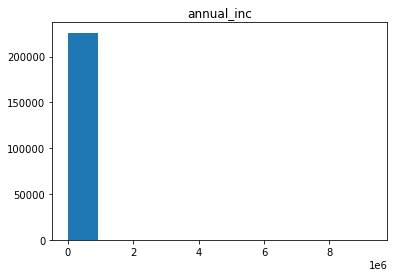

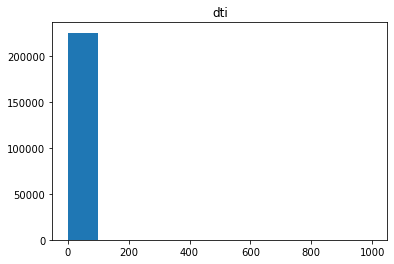

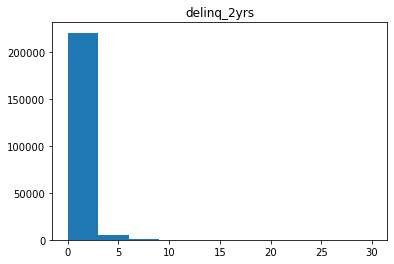

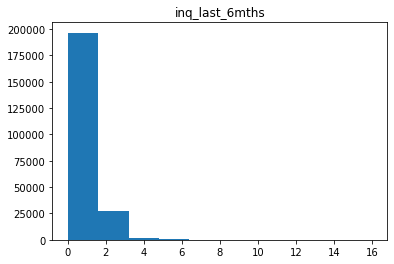

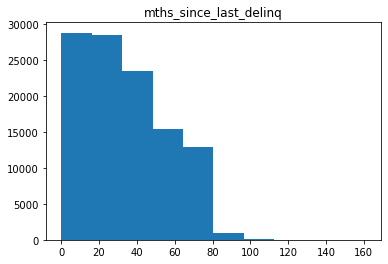

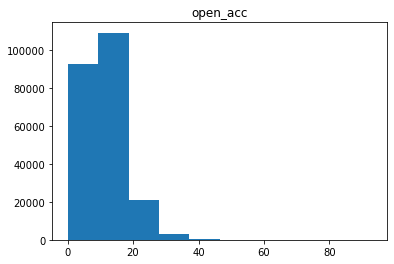

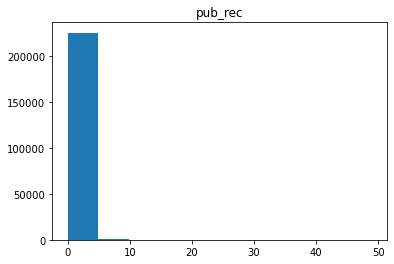

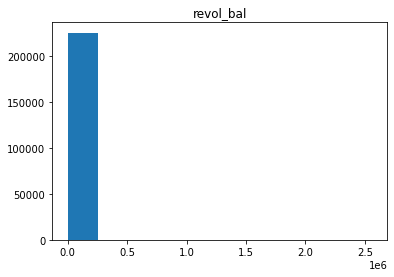

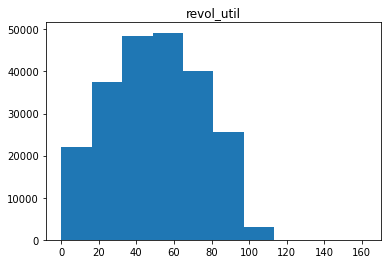

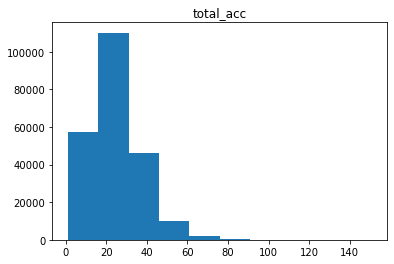

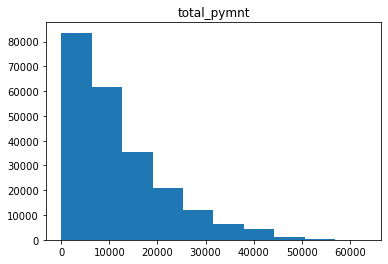

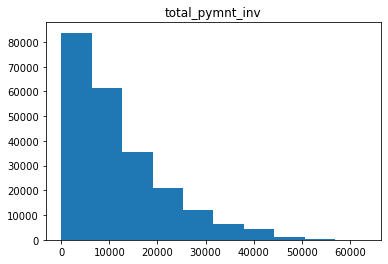

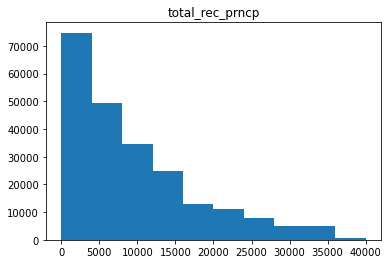

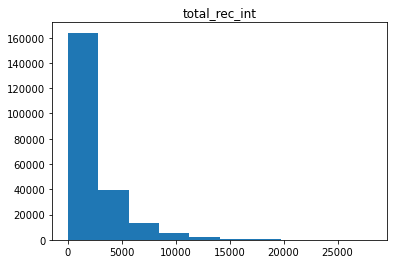

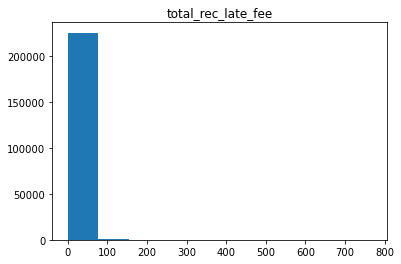

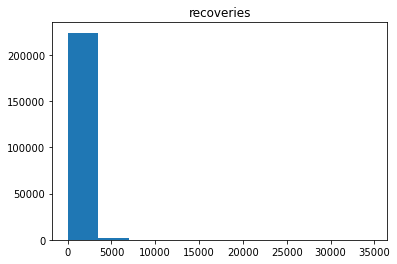

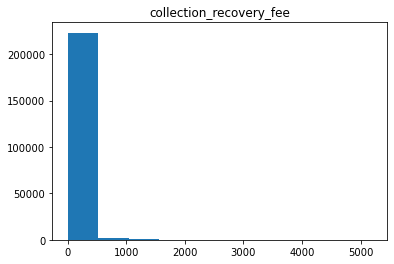

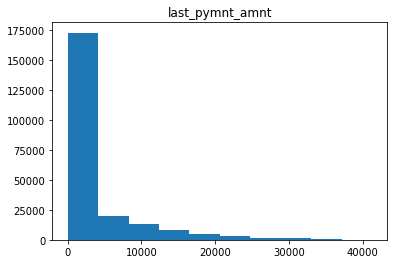

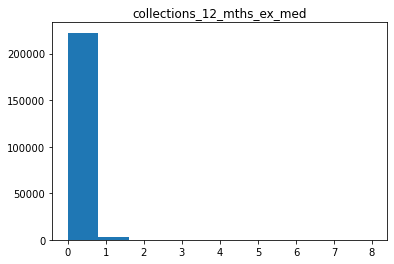

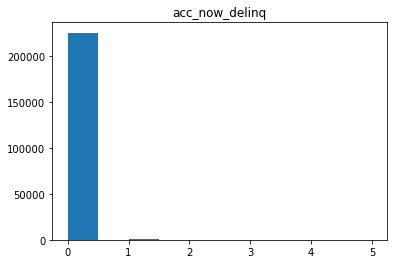

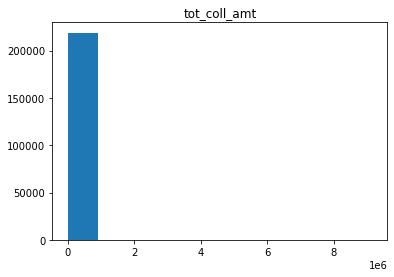

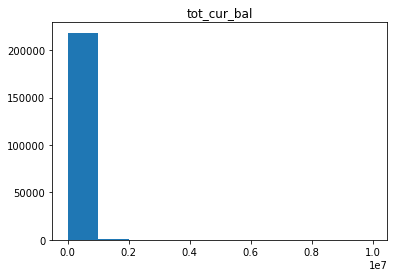

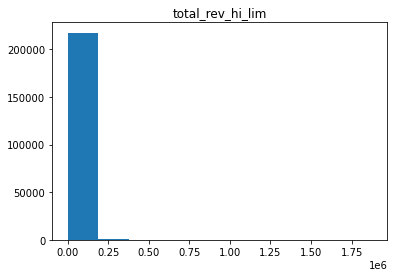

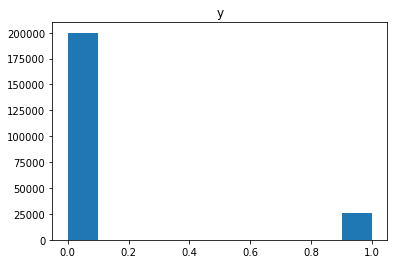

In [12]:
# Visualize numerical features distributions
for i in numerical_features.columns:
    plt.hist(numerical_features[i])
    plt.title(i)
    plt.show()

Most of our numerical columns values are skewed to the left.
- Distribution of loan_amt, int_rate and installment is nearly smiliar showing that there are more customers who borrow relatively lower amounts, and thus their interest rates are also usually lower.
- annual_inc, dti,delinq_2yrs, inq_last_6months are heavily skewed to the left, showing that there might be a presence of outliers in terms of annual income and inquiries made into the applicant's credit in the past 6 months
- The remaining columns are also skewed to the left, and these columns show recovery fees, total payments made. And these means that it is usually smaller amounts of loan as compared to the large amounts.
- Beacuse the 

Text(0.5, 1.0, 'Feature Correlation')

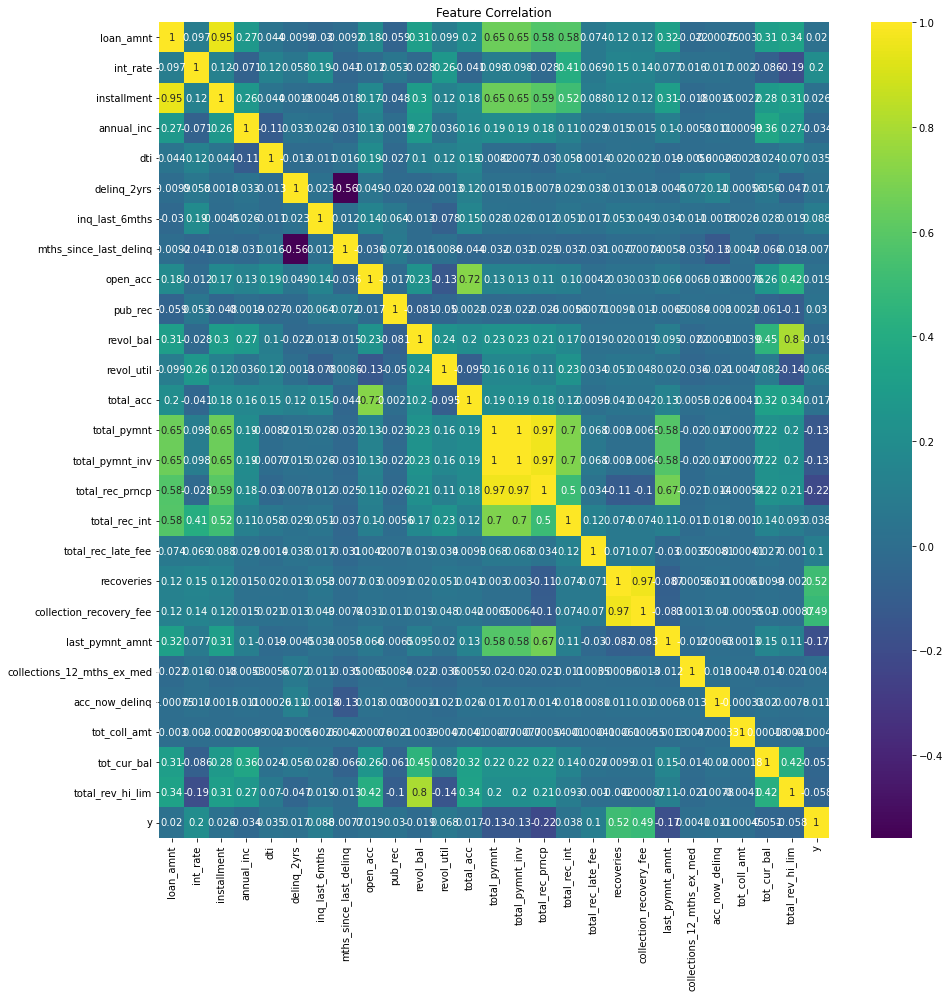

In [13]:
# Visualize numerical features correlation
plt.figure(figsize=(15, 15))
sns.heatmap(numerical_features.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation')

Some features in here are strongly correlated, we need to remove some as this can affect our model.

    - loan_amnt and installment. We remove installment
    - open_acc and total_acc. We remove total_acc
    - revol_bal and total_rev_hi_lim. We remove total_rev_hi_lim.
    - total_payment and total_pymnt_inv. We remove total_pymnt_inv.
    - total_pymnt and total_rec_prncp. We remove total_rec_prncp
    - total_pymnt and total_rec_int. We remove total_rec_int
    - recoveries and collection_recovery_fee. Remove collection_recovery_fee
    
This comes with a risk as we are losing information.

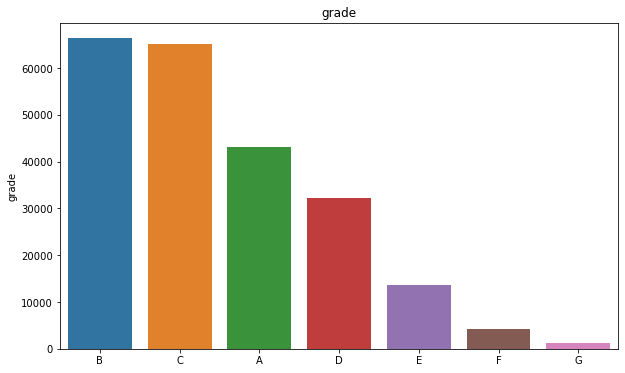

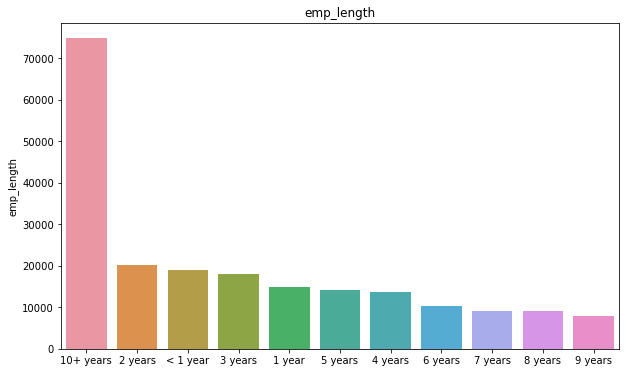

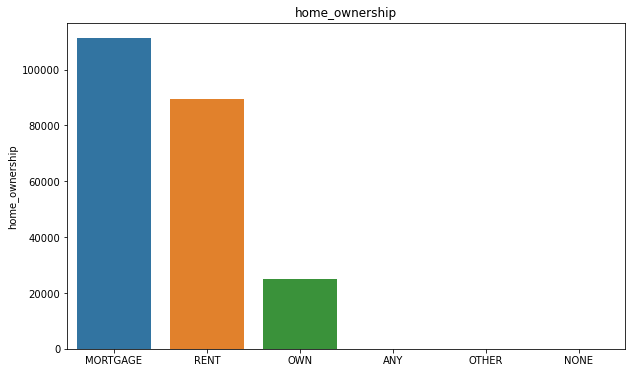

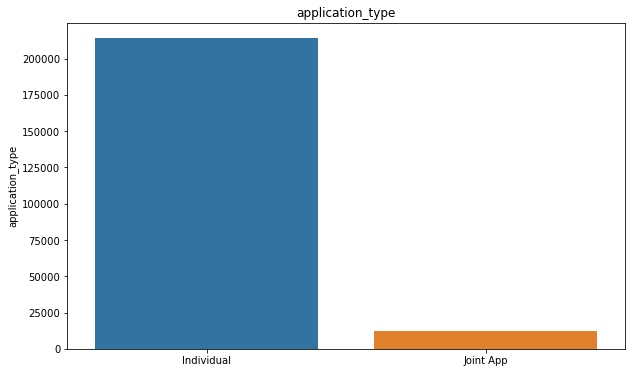

In [14]:
# Visualize categorical features distributions
for i in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(categorical_features[i].value_counts().index, categorical_features[i].value_counts()).set_title(i)
    plt.show()

From the above bar plots, we can see how categorical variables are distributed throughout the dataset. Which values have a high count. For example, we can see that most applicant have been employed for more than 10 years. However the distrivution for employment length also shows that most of the other applicanbt have been recently employed, and then at last there are applicant who have employment length that ranges from 6 to 9 years inclusive.
Lastly, we can see that only 11.6% of applicant's loan status have been charged off.

### Data Cleaning

In [15]:
print("Missing values: ",train.isnull().sum().sum())

Missing values:  152188


In [16]:
numerical_cols=[col for col in train.columns if train[col].dtype!=object]
categorical_cols=[col for col in train.columns if train[col].dtype==object]
print("No of Numerical features =",len(numerical_cols))
print("No of Categorical features =",len(categorical_cols))

No of Numerical features = 27
No of Categorical features = 4


In [17]:
train.isnull().sum()/len(train)*100

loan_amnt                      0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_length                     6.463128
home_ownership                 0.000000
annual_inc                     0.000000
dti                            0.079622
delinq_2yrs                    0.002212
inq_last_6mths                 0.002212
mths_since_last_delinq        51.241446
open_acc                       0.002212
pub_rec                        0.002212
revol_bal                      0.000000
revol_util                     0.084046
total_acc                      0.002212
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
collections_12_mths_ex_med     0.007078


In [18]:
# Handle missing values
columns_to_impute = ['annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 
                     'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','total_acc','total_rev_hi_lim']
imputer = SimpleImputer(strategy='median')
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])
test[columns_to_impute] = imputer.transform(test[columns_to_impute])  # Use transform for the test set
train.drop(columns=['mths_since_last_delinq'], inplace=True)
test.drop(columns=['mths_since_last_delinq'], inplace=True)

In [19]:
# Convert 'emp_length' column to numeric
train['emp_length'] = train['emp_length'].str.replace(' years', '').str.replace(' year', '').str.replace('+', '')
test['emp_length'] = test['emp_length'].str.replace(' years', '').str.replace(' year', '').str.replace('+', '')
train['emp_length'] = pd.to_numeric(train['emp_length'], errors='coerce')
test['emp_length'] = pd.to_numeric(test['emp_length'], errors='coerce')
median_emp_length = train['emp_length'].median()
train['emp_length'].fillna(median_emp_length, inplace=True)
test['emp_length'].fillna(median_emp_length, inplace=True)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols_train = pd.DataFrame(encoder.fit_transform(train[categorical_features.columns]))
encoded_cols_test = pd.DataFrame(encoder.transform(test[categorical_features.columns]))

# Set column names of one-hot encoded DataFrame to strings
encoded_cols_train.columns = encoder.get_feature_names_out(categorical_features.columns)
encoded_cols_test.columns = encoder.get_feature_names_out(categorical_features.columns)

# Drop original categorical columns and replace with one-hot encoded columns
train.drop(columns=categorical_features.columns, inplace=True)
train = pd.concat([train, encoded_cols_train], axis=1)
test.drop(columns=categorical_features.columns, inplace=True)
test = pd.concat([test, encoded_cols_test], axis=1)


Top 10 Most Correlated Variables (excluding 'y'):
recoveries                 0.516998
collection_recovery_fee    0.492596
int_rate                   0.198602
grade_E                    0.115201
total_rec_late_fee         0.101508
grade_F                    0.100802
grade_D                    0.089890
inq_last_6mths             0.087965
revol_util                 0.067855
grade_G                    0.057430
dtype: float64

Top 10 Least Correlated Variables (excluding 'y'):
annual_inc                   -0.033715
home_ownership_MORTGAGE      -0.043965
tot_cur_bal                  -0.051377
application_type_Joint App   -0.051467
total_rev_hi_lim             -0.057365
grade_B                      -0.078461
total_pymnt_inv              -0.132253
total_pymnt                  -0.132429
last_pymnt_amnt              -0.174919
total_rec_prncp              -0.216278
dtype: float64


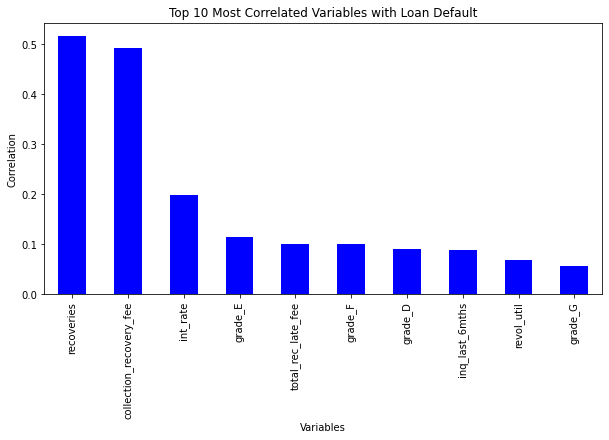

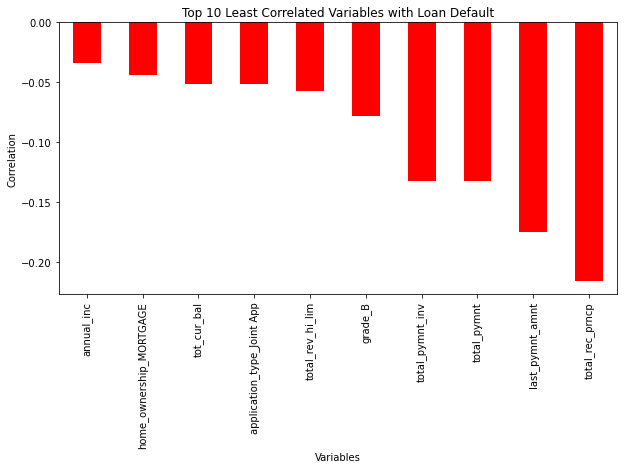

In [20]:
# Compute correlation with target variable
correlation_with_target = train.drop('y', axis=1).corrwith(train['y']).sort_values(ascending=False)

# Top 10 most correlated variables (excluding 'y')
top_10_correlated = correlation_with_target.head(10)
print("Top 10 Most Correlated Variables (excluding 'y'):")
print(top_10_correlated)

# Top 10 least correlated variables (excluding 'y')
least_correlated = correlation_with_target.tail(10)
print("\nTop 10 Least Correlated Variables (excluding 'y'):")
print(least_correlated)

# Visualize top 10 most correlated variables
plt.figure(figsize=(10, 5))
top_10_correlated.plot(kind='bar', color='blue')
plt.title('Top 10 Most Correlated Variables with Loan Default')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

# Visualize top 10 least correlated variables
plt.figure(figsize=(10, 5))
least_correlated.plot(kind='bar', color='red')
plt.title('Top 10 Least Correlated Variables with Loan Default')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()


In [21]:
# Update numerical features dataframe after dropping columns
numerical_features = train.select_dtypes(include=[float, int]).drop(columns=['y'])


# Separate features and target variable for training data
X_train = train.drop(columns=['y'])
y_train = train['y']

# Separate features and target variable for test data
X_test = test.drop(columns=['y'])
y_test = test['y']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features on training data
X_train[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])

# Transform test data using the scaler fitted on training data
X_test[numerical_features.columns] = scaler.transform(X_test[numerical_features.columns])

# Print the first few rows of the modified DataFrame to verify the changes
print(X_train.head())
print(X_test.head())

   loan_amnt  int_rate  installment  annual_inc       dti  delinq_2yrs  \
0   0.385954 -0.435287     0.608687    0.021752 -0.417545    -0.357010   
1  -1.422851  1.010940    -1.401048   -0.276942 -0.580790     0.800894   
2  -0.333209 -0.165933    -0.172690   -0.221089 -0.062666    -0.357010   
3   0.102647  1.311375     0.537673   -0.172521 -1.057749     0.800894   
4   0.813639  0.606908     0.380776    0.192712  0.019666     0.800894   

   inq_last_6mths  open_acc   pub_rec  revol_bal  ...  emp_length_7.0  \
0       -0.652887 -0.639479 -0.346563  -0.112187  ...       -0.483454   
1        1.602004 -0.284926 -0.346563  -0.429566  ...       -0.483454   
2       -0.652887  0.424180 -0.346563  -0.083697  ...       -0.483454   
3       -0.652887 -1.171309 -0.346563  -0.382012  ...        2.068450   
4       -0.652887  0.601457 -0.346563   0.161587  ...       -0.483454   

   emp_length_8.0  emp_length_9.0  emp_length_10.0  home_ownership_MORTGAGE  \
0       -0.204703       -0.190815    

### Model Estimation

#### 1.1 Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the model on the train data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = linear_model.predict(X_train)
# Mean Squared Error for training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training - Linear Regression):", mse_train)

# Predictions on testing data
y_test_pred = linear_model.predict(X_test)
# Mean Squared Error for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Testing - Linear Regression):", mse_test)

Mean Squared Error (Training - Linear Regression): 0.06779610691647404
Mean Squared Error (Testing - Linear Regression): 0.06860668637159303


#### 1.2 Ridge Regression

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.arange(0.01, 100.01, 0.01)}  # lambda values from 0.01 to 100 with an increment of 0.01
ridge_random = RandomizedSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5, n_iter=100)
ridge_random.fit(X_train, y_train)

# Best alpha (lambda) for Ridge
best_alpha_ridge = ridge_random.best_params_['alpha']
print("Best alpha (Ridge):", best_alpha_ridge)

# Mean Squared Error for the best Ridge model on training data
mse_train_ridge = -ridge_random.best_score_
print("Mean Squared Error (Training - Ridge):", mse_train_ridge)

# Mean Squared Error for the best Ridge model on testing data
mse_test_ridge = mean_squared_error(y_test, ridge_random.best_estimator_.predict(X_test))
print("Mean Squared Error (Testing - Ridge):", mse_test_ridge)

Best alpha (Ridge): 99.34
Mean Squared Error (Training - Ridge): 0.06824538842207059
Mean Squared Error (Testing - Ridge): 0.06861120933215235


#### 1.3 Lasso Regression

In [24]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': np.arange(0.01, 100.01, 0.01)}  # lambda values from 0.01 to 100 with an increment of 0.01
lasso_random = RandomizedSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5, n_iter=100)
lasso_random.fit(X_train, y_train)

# Best alpha (lambda) for Lasso
best_alpha_lasso = lasso_random.best_params_['alpha']
print("Best alpha (Lasso):", best_alpha_lasso)

# Mean Squared Error for the best Lasso model on training data
mse_train_lasso = -lasso_random.best_score_
print("Mean Squared Error (Training - Lasso):", mse_train_lasso)

# Mean Squared Error for the best Lasso model on testing data
mse_test_lasso = mean_squared_error(y_test, lasso_random.best_estimator_.predict(X_test))
print("Mean Squared Error (Testing - Lasso):", mse_test_lasso)

Best alpha (Lasso): 72.19000000000001
Mean Squared Error (Training - Lasso): 0.10213034189740981
Mean Squared Error (Testing - Lasso): 0.10247702603422762


#### 1.4 Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'max_depth': [10,50],  
    'n_estimators': [100, 200]  
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform random search with 5-fold cross-validation
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                      n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search model on training data
rf_random_search.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model
best_rf_classifier = rf_random_search.best_estimator_

# Predictions on training data
y_train_pred_rf = best_rf_classifier.predict(X_train)
# Accuracy for training data
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy (Training - Random Forest Classifier):", accuracy_train_rf)

# Predictions on testing data
y_test_pred_rf = best_rf_classifier.predict(X_test)
# Accuracy for testing data
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy (Testing - Random Forest Classifier):", accuracy_test_rf)





Best Parameters: {'n_estimators': 200, 'max_depth': 50}
Accuracy (Training - Random Forest Classifier): 1.0
Accuracy (Testing - Random Forest Classifier): 0.9655898472576714


In [26]:
# Predictions on training data
y_train_pred_rf = best_rf_classifier.predict(X_train)
# Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
print("Mean Squared Error (Training - Random Forest):", mse_train_rf)

# Predictions on testing data
y_test_pred_rf = best_rf_classifier.predict(X_test)
# Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
print("Mean Squared Error (Testing - Random Forest):", mse_test_rf)


Mean Squared Error (Training - Random Forest): 0.0
Mean Squared Error (Testing - Random Forest): 0.0344101527423286


Feature Importance: [1.75347905e-02 4.13130034e-02 2.23387807e-02 1.53252769e-02
 1.66158055e-02 3.44617016e-03 7.03783042e-03 1.14741880e-02
 3.70174047e-03 1.61889255e-02 1.65242243e-02 1.40593425e-02
 2.52785507e-02 2.40966654e-02 3.88142029e-02 2.21746965e-02
 1.17085730e-02 3.25289834e-01 2.59408668e-01 3.42542415e-02
 6.73850033e-04 4.17585831e-04 4.73374461e-03 1.64372615e-02
 1.61399877e-02 1.52516115e-03 2.18574573e-03 2.94987336e-03
 4.07084133e-03 3.06229844e-03 7.42204250e-04 1.54083701e-03
 1.33112396e-03 1.18757484e-03 1.22193616e-03 9.35199673e-04
 2.19115716e-03 1.10999596e-03 1.06531932e-03 2.21287041e-03
 2.05214012e-03 4.52355802e-07 1.47362264e-05 1.44268026e-03
 2.17549177e-03 1.99442031e-03]


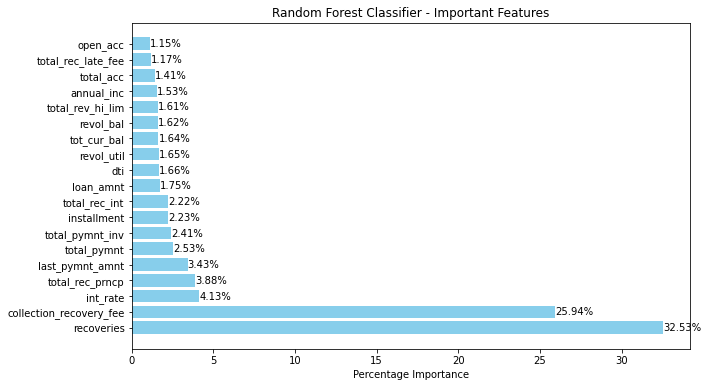

In [27]:
# Feature importance
feature_importance = best_rf_classifier.feature_importances_
print("Feature Importance:", feature_importance)

# Sort features by importance (descending order)
important_features = np.argsort(feature_importance)[::-1]

# Select features with importance greater than a threshold (optional)
threshold = 0.01  # You can adjust this threshold
important_features = important_features[feature_importance[important_features] >= threshold]

# Get feature names and importance for plotting
important_feature_names = X_train.columns[important_features]
important_feature_importance = feature_importance[important_features] * 100  # Scale importance for visualization

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(important_features)), important_feature_importance, align='center', color='skyblue')
plt.yticks(range(len(important_features)), important_feature_names)
plt.xlabel('Percentage Importance')
plt.title('Random Forest Classifier - Important Features')

for index, value in enumerate(important_feature_importance):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()


#### 1.5 Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [100,150],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01],
    'learning_rate': ['constant']
}

# Initialize MLP classifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=1000)

# Perform random search with 5-fold cross-validation
mlp_random_search = RandomizedSearchCV(estimator=mlp_classifier, param_distributions=param_grid,
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search model on training data
mlp_random_search.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = mlp_random_search.best_params_
print("Best Parameters (MLP Classifier):", best_params_mlp)

# Evaluate the best model
best_mlp_classifier = mlp_random_search.best_estimator_

# Predictions on training data
y_train_pred_mlp = best_mlp_classifier.predict(X_train)
# Accuracy for training data
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
print("Accuracy (Training - MLP Classifier):", accuracy_train_mlp)

# Predictions on testing data
y_test_pred_mlp = best_mlp_classifier.predict(X_test)
# Accuracy for testing data
accuracy_test_mlp = accuracy_score(y_test, y_test_pred_mlp)
print("Accuracy (Testing - MLP Classifier):", accuracy_test_mlp)

Best Parameters (MLP Classifier): {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 100, 'alpha': 0.01, 'activation': 'relu'}
Accuracy (Training - MLP Classifier): 0.9636390981434707
Accuracy (Testing - MLP Classifier): 0.960516130173798


#### 1.6 Model Evaluation

In [29]:
best_ridge_model = ridge_random.best_estimator_
best_lasso_model = lasso_random.best_estimator_

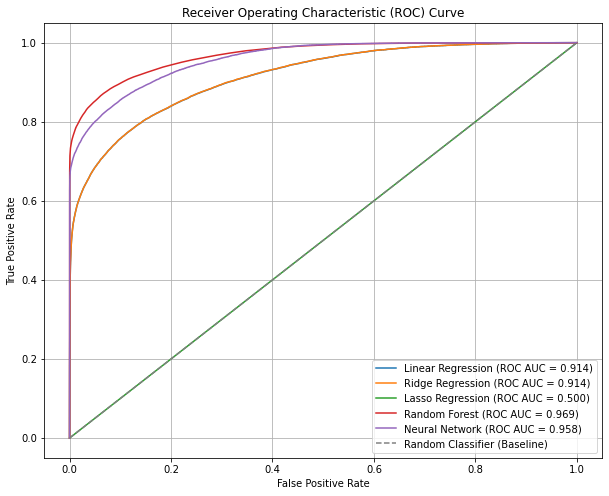

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

# Create a dictionary of models
ml_models = {
    'Linear Regression': linear_model,
    'Ridge Regression': best_ridge_model,
    'Lasso Regression': best_lasso_model,
    'Random Forest': best_rf_classifier,
    'Neural Network': best_mlp_classifier
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in ml_models.items():
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        # For linear models, predict raw values
        y_pred = model.predict(X_test)
    else:
        # For other models, predict probabilities for positive class
        y_pred = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.3f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier (Baseline)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Since random is the best model, we however want to see if it is good at just predicting non-defaulters or if it does equally well in predicting defaulters.

<Figure size 576x432 with 0 Axes>

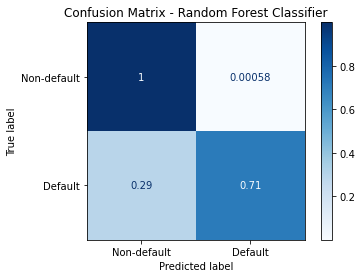

In [31]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_rf_classifier, X_test, y_test, display_labels=['Non-default', 'Default'], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



<Figure size 576x432 with 0 Axes>

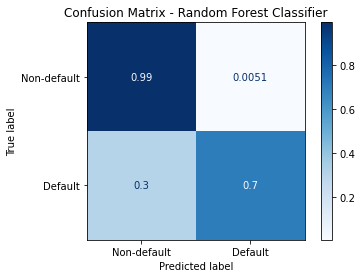

In [32]:
# Plot confusion matrix for Neural Network classifier
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_mlp_classifier, X_test, y_test, display_labels=['Non-default', 'Default'], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()